### Making a proper dataset.

In [1]:
# data handling and manipulation libraries
import pandas as pd
import numpy as np

# librarires for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the very basic dataset.
cols = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('u.data', sep='\t', names=cols)
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
# as we can see in the above dataset, there's no movies' names making user readability and interpretability much less
# so we import another dataset that maps those movie_id(s) to their names.
movie_id_data = pd.read_csv('Movie_Id_Titles')
movie_id_data.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
# next step involves merging these two datasets on a common column i.e. movie_id
combined_data = pd.merge(data, movie_id_data, on='item_id')
combined_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
# and there we have it :) ^^
# timestamp is not very relevant right now for our recommendation system (ofcourse it'll be important in much advanced systems.)
# so i'll just drop that column.
combined_data.drop('timestamp', axis = 1, inplace=True)

In [6]:
# renaming our combined_data to a much simpler name to type.
data = combined_data
data.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  100003 non-null  int64 
 1   item_id  100003 non-null  int64 
 2   rating   100003 non-null  int64 
 3   title    100003 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [8]:
# as we can see our dataset is super clean and is ready to use :)

### Performing exploratory data analysis.

In [9]:
data.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
# the ratings have such HIGH average values because of less number of ratings.
# so what we can do to remove this bias is, not consider those movies which have less than 100 ratings.
# creating a new pandas DataFrame to store movies' ratings and number of ratings.

ratings_counts = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings_counts['counts'] = pd.DataFrame(data.groupby('title')['rating'].count())

In [11]:
# checking out our new dataset ^_^
ratings_counts.head()

,rating,counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [12]:
'''
Summarizing/revising our variables:
    ratings_counts : for ratings and counts of movies
    data : master dataset.
    combined_data : obsolete variable, not in use anymore.
'''

'\nSummarizing/revising our variables:\n    ratings_counts : for ratings and counts of movies\n    data : master dataset.\n    combined_data : obsolete variable, not in use anymore.\n'

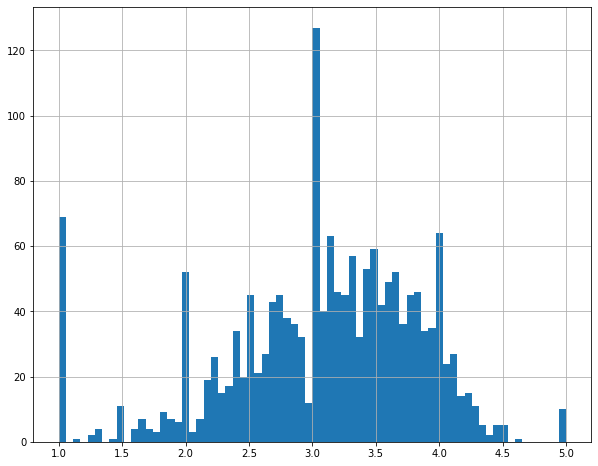

In [13]:
# starting with plotting the dataset.
plt.figure(figsize=(10,8))
ratings_counts['rating'].hist(bins=70)

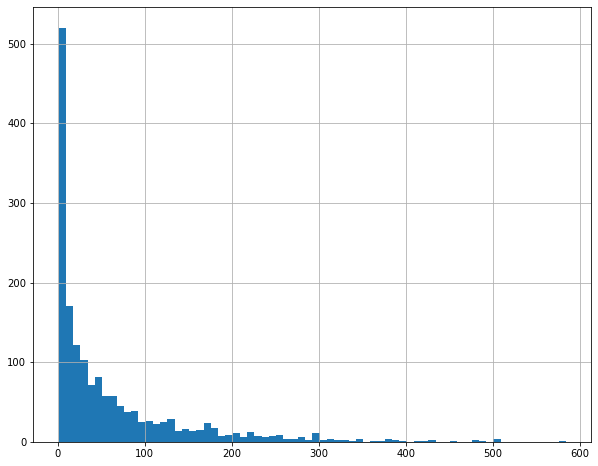

In [14]:
# from the above graph we can see that its a normal (Gaussian) distribution (with a few outliers).
# Now let's see what the distribution of counts of ratings looks like.
plt.figure(figsize=(10,8))
ratings_counts['counts'].hist(bins=70)

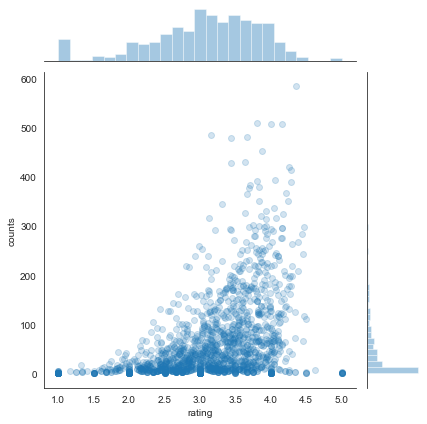

In [15]:
# A good correlation between these 2 plots can be seen using a jointplot from seaborn library
sns.set_style('white')
sns.jointplot(x = 'rating', y = 'counts', data=ratings_counts, alpha = 0.2)

In [16]:
# From the plot above, it can be clearly seen that there are so many movies with very less number of ratings and less
# average rating. (the lower region of our plot with large dark region)

# this marks the end of our EDA, moving on to making the actual recommendation system.

### Making the recommendation system.

In [17]:
# Having a look at our data once again
data.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [18]:
# Since we want to find correlation between users' interests. This can be done efficiently using a pivot table.
# A pivot table can be a good way to look at data from a different perspective, changing the axes.

movie_pivot = data.pivot_table(index='user_id', columns='title', values = 'rating')
movie_pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# The NaN values in the above dataset are instances where the user has not rated the particular movie.

In [20]:
'''
A recommendation is made using the correlation between 2 vectors.
This correlation is calculated using the distance between the vectors.
This can also be done using the cosine of the angle between the vectors.
An implement of the above method is done while calculating "Pearson correlation".
'''

'\nA recommendation is made using the correlation between 2 vectors.\nThis correlation is calculated using the distance between the vectors.\nThis can also be done using the cosine of the angle between the vectors.\nAn implement of the above method is done while calculating "Pearson correlation".\n'

In [23]:
# movie_to_correlate = 'Star Wars (1977)' # movie name variable to generalise the process in future
def get_corr(movie_to_correlate, n = 5):
    '''
    n : the first n most favorable movies.
    '''
    user_ratings = movie_pivot[movie_to_correlate]  # getting the column of ratings per user.
    user_ratings.dropna(inplace = True)
    similar_to_movie = movie_pivot.corrwith(user_ratings) # This gives a lot of movies with correlation = 1. Not  quite possible.
    corr_values = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_values = corr_values.join(ratings_counts['counts'])
    
    return corr_values[corr_values['counts']>100].sort_values('Correlation',ascending=False)[1:].head(n)# corr_values[corr_values['num of ratings']>100].sort_values('Correlation',ascending=False).head()

In [ ]:
get